<a href="https://colab.research.google.com/github/khushisrivastava1/sampling/blob/main/SAMPLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
import math
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [188]:
credit_card=pd.read_csv('/content/sampling_dataset.csv')

In [189]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [190]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


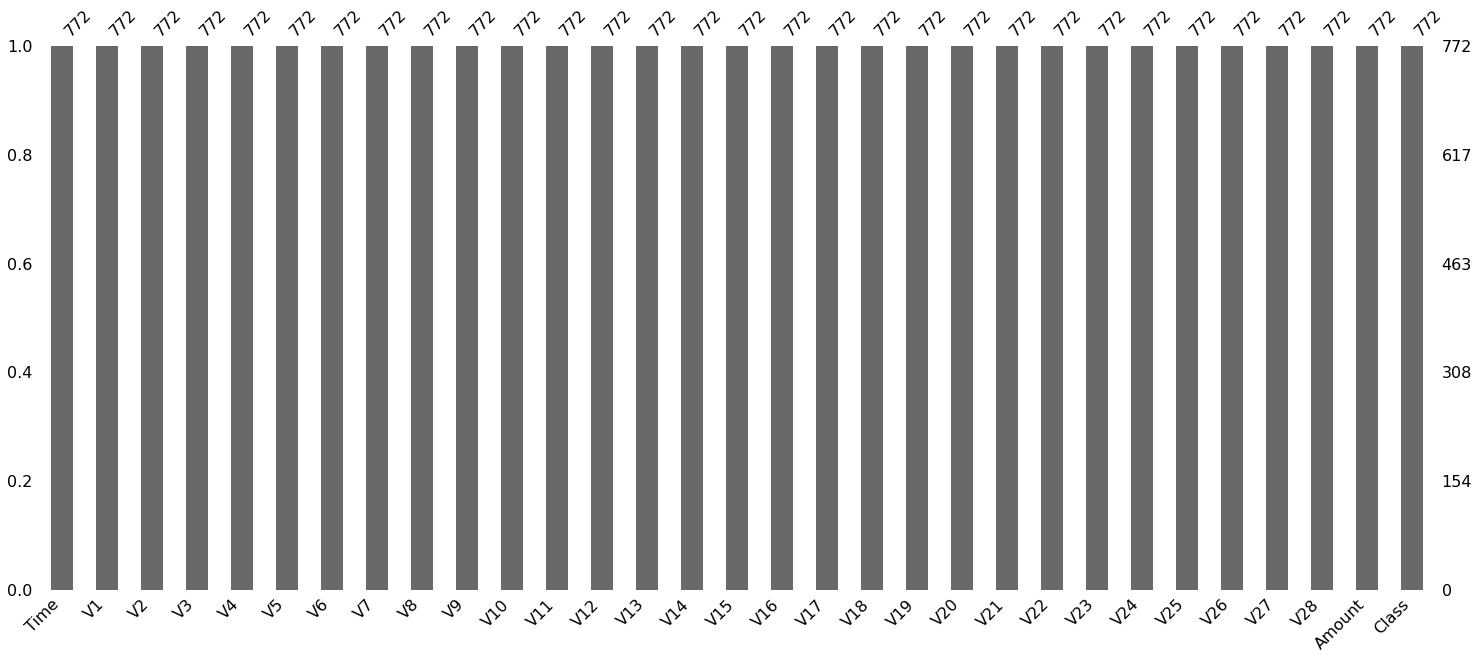

In [191]:
import missingno as ms
ms.bar(credit_card)

In [192]:
class_0 = credit_card[credit_card['Class'] == 0]
class_1 = credit_card[credit_card['Class'] == 1]

In [193]:
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BALANCING THE DATASET

In [197]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print((y_resampled==0).sum())
print((y_resampled==1).sum())

763
763


In [198]:
df=pd.DataFrame(X_resampled)
df['Class']=y_resampled

SIMPLE SAMPLING

In [200]:
z=1.96
p=0.5
E=0.05
sample_size = math.ceil((z*z*p*(1-p))/(E*E))
samples=[]
s1 = df.sample(n=sample_size, random_state=0)
samples.append(s1)

SYSTEMATIC SAMPLING

In [201]:
n = len(df)
k = int(math.sqrt(n))
s2 = df.iloc[::k]
samples.append(s2)

STRATIFIED SAMPLING

In [202]:
s3=df.groupby('Class', group_keys=False).apply(lambda x: x.sample(190))
samples.append(s3)

CLUSTER SAMPLING

In [203]:
z=1.96
p=0.5
E=0.05
C=1.5
sample_size = round(((z**2)*p*(1-p))/((E/C)**2))
num_select_clusters=2
df_new=df
N = len(df)
K = int(N/sample_size)
data = None
for k in range(K):
    sample_k = df_new.sample(sample_size)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df_new = df_new.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
s4 = data[data.cluster.isin(random_chosen_clusters)]
s4.drop(['cluster'], axis=1, inplace=True)
samples.append(s4)

RANDOM OVERSAMPLING ON ORIGINAL IMBALANCED DATASET

In [204]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

In [205]:
X_resampled1, y_resampled1 = sampler.fit_resample(X_train, y_train)
df_new1=pd.DataFrame(X_resampled1)
df_new1['Class']=y_resampled1
s5=df_new1
samples.append(s5)

In [206]:
sampling=['Simple','Systematic','Cluster','Stratified','Random_oversampling']
final_df=pd.DataFrame(columns=sampling, index=['Logistic Regression','Support Vector Machine','K Nearest Neighbours','XGBoost','Random Forest'])

In [207]:
for i in range(5):
    index=0
    x=samples[i].drop('Class',axis=1)
    y=samples[i]['Class']
    xtrain, xtest, y_train, y_test = train_test_split(x ,y , random_state=42, test_size=0.2, shuffle=True)

    classifier = LogisticRegression(max_iter=5000)
    classifier.fit(xtrain, y_train)
    y_pred = classifier.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    final_df.iloc[index,i]=accuracy*100

    clf = SVC()
    clf.fit(xtrain, y_train) 
    y_pred=clf.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    final_df.iloc[index+1,i]=accuracy*100

    knn = KNeighborsClassifier()
    knn.fit(xtrain, y_train)
    y_pred=knn.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    final_df.iloc[index+2,i]=accuracy*100

    xg=XGBClassifier()
    xg.fit(xtrain, y_train)
    y_pred=xg.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    final_df.iloc[index+3,i]=accuracy*100

    
    clf = RandomForestClassifier() 
    clf.fit(xtrain, y_train)
    y_pred = clf.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    final_df.iloc[index+4,i]=accuracy*100
print(final_df)

                           Simple Systematic    Cluster Stratified  \
Logistic Regression     94.805195       62.5  89.473684  94.219653   
Support Vector Machine  68.831169       12.5  55.263158  67.052023   
K Nearest Neighbours    77.922078       12.5  68.421053  84.393064   
XGBoost                 97.402597       87.5  98.684211  98.265896   
Random Forest           98.701299       87.5  98.684211  99.421965   

                       Random_oversampling  
Logistic Regression              92.213115  
Support Vector Machine           76.229508  
K Nearest Neighbours             99.590164  
XGBoost                              100.0  
Random Forest                        100.0  
